In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'        # 设置使用黑体字体以正常显示中文
plt.rcParams['axes.unicode_minus']=False   # 正常显示负号

#加载csv文件
df = pd.read_csv('filtered_data.csv')
print(df.head())

        Entity  Year  Annual CO₂ emissions  \
0  Afghanistan  2011            11838316.0   
1  Afghanistan  2012            10035314.0   
2  Afghanistan  2013             9250510.0   
3  Afghanistan  2014             9170309.0   
4  Afghanistan  2015             9791093.0   

   Annual CO₂ emissions including land-use change  \
0                                      12277996.0   
1                                      10474994.0   
2                                       9470350.0   
3                                       9280229.0   
4                                      10194133.0   

   Annual CO₂ emissions from land-use change  Annual CO₂ emissions_标准化  \
0                                   439680.0                 -0.224142   
1                                   439680.0                 -0.298611   
2                                   219840.0                 -0.331026   
3                                   109920.0                 -0.334338   
4                                 

In [39]:
#数据探索性分析

              Year  Annual CO₂ emissions  \
count  1433.000000          1.433000e+03   
mean   2016.055827          1.726509e+07   
std       3.145176          2.421980e+07   
min    2011.000000          1.877000e+04   
25%    2013.000000          8.271550e+05   
50%    2016.000000          5.630826e+06   
75%    2019.000000          2.645721e+07   
max    2021.000000          1.188547e+08   

       Annual CO₂ emissions including land-use change  \
count                                    1.433000e+03   
mean                                     1.875940e+07   
std                                      2.406034e+07   
min                                     -1.949122e+06   
25%                                      1.941920e+06   
50%                                      8.195496e+06   
75%                                      2.846176e+07   
max                                      1.155578e+08   

       Annual CO₂ emissions from land-use change  Annual CO₂ emissions_标准化  \
count      

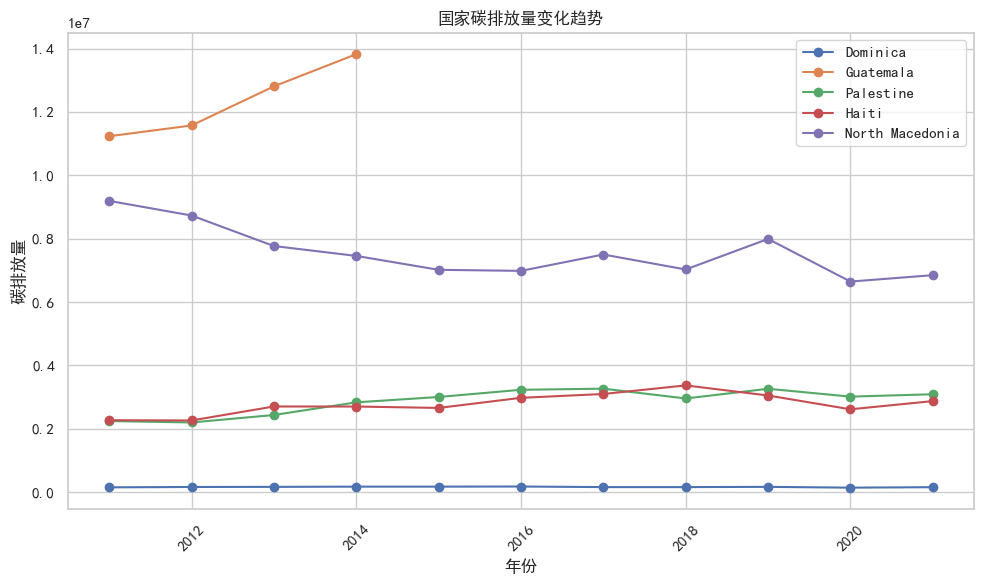

In [72]:
#计算描述性统计
print(df.describe())

#可视化国家碳排放量变化趋势（随机选取几个国家）
sample_entity = df['Entity'].sample(5,random_state=42).values

plt.figure(figsize=(10,6))
for i in sample_entity:
    data = df[df['Entity'] == i]
    plt.plot(data['Year'],data['Annual CO₂ emissions'],marker='o',label=i)
    
plt.title("国家碳排放量变化趋势")
plt.xlabel("年份")
plt.ylabel("碳排放量")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
#时序聚类分析
#安装并导入所需库
!pip install tslearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


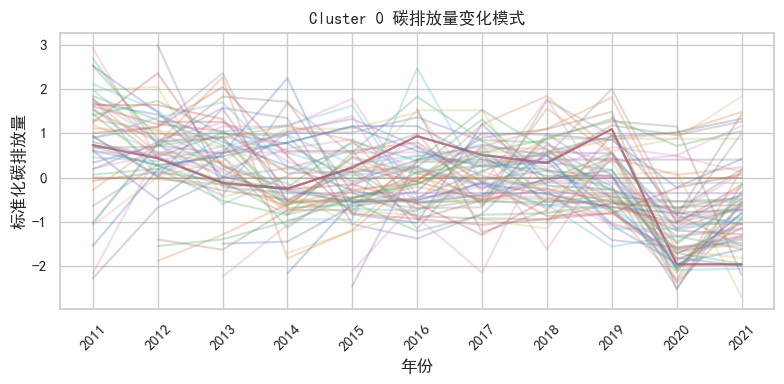

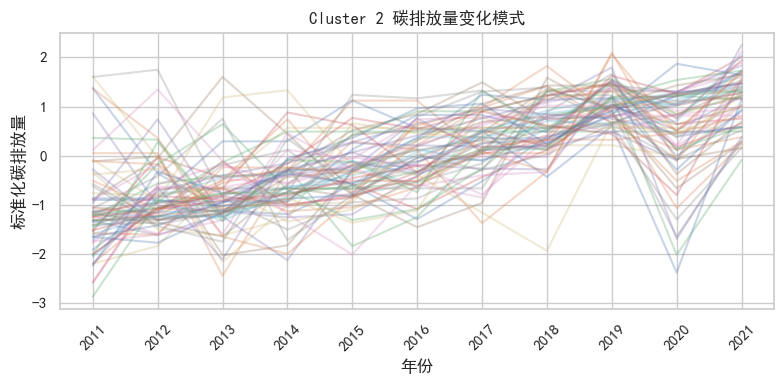

In [73]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# 构建时序数据
time_series_data = df.pivot(index="Entity", columns="Year", values="Annual CO₂ emissions").fillna(method='ffill', axis=1)

# 标准化数据
scaler = TimeSeriesScalerMeanVariance()
scaled_data = scaler.fit_transform(time_series_data.values)

# DTW + K-means聚类
dtw_km = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=42)
clusters = dtw_km.fit_predict(scaled_data)

# 将聚类结果添加到DataFrame
time_series_data["Cluster"] = clusters

# 绘制聚类结果图
for cluster in np.unique(clusters):
    plt.figure(figsize=(8, 4))
    plt.title(f"Cluster {cluster} 碳排放量变化模式")
    for ts in scaled_data[clusters == cluster]:
        plt.plot(ts.ravel(), alpha=0.3)
    plt.xlabel("年份")
    plt.ylabel("标准化碳排放量")
    plt.xticks(ticks=range(len(time_series_data.columns)-1), labels=time_series_data.columns[:-1], rotation=45)
    plt.tight_layout()
    plt.show()

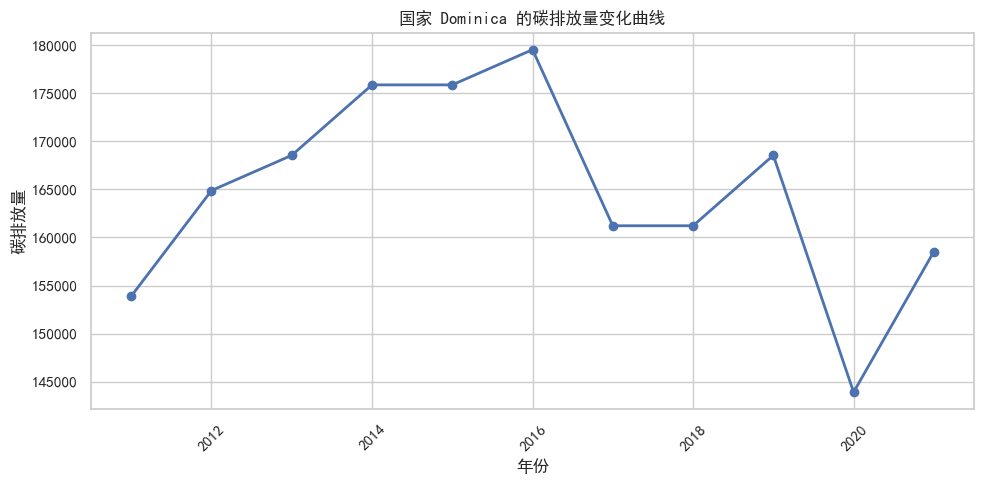

In [74]:
#单个国家碳排放量绘制与分析
entity_id = sample_entity[0]  # 举例第一个国家
entity_data = df[df["Entity"] == entity_id]

plt.figure(figsize=(10, 5))
plt.plot(entity_data["Year"], entity_data["Annual CO₂ emissions"], marker='o', linestyle='-', linewidth=2)
plt.title(f"国家 {entity_id} 的碳排放量变化曲线")
plt.xlabel("年份")
plt.ylabel("碳排放量")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
#按国家计算2011-2021年总碳排放量和年平均碳排放量
entity_sum = df.groupby('Entity').agg(
    Total_Carbon_Emissions=('Annual CO₂ emissions','sum'),
    Average_Carbon_Emissions=('Annual CO₂ emissions','mean')
).reset_index()

#显示汇总结果
print(entity_sum)

                  Entity  Total_Carbon_Emissions  Average_Carbon_Emissions
0            Afghanistan             114476755.0              1.040698e+07
1                Albania              55639321.0              5.058120e+06
2                Andorra               5192316.0              4.720287e+05
3               Anguilla               1565862.0              1.423511e+05
4    Antigua and Barbuda               5177364.0              4.706695e+05
..                   ...                     ...                       ...
140           Uzbekistan             891049540.0              1.113812e+08
141              Vanuatu               1605425.0              1.459477e+05
142            Venezuela             245325214.0              8.177507e+07
143                Yemen             177531409.0              1.613922e+07
144             Zimbabwe             112069865.0              1.120699e+07

[145 rows x 3 columns]


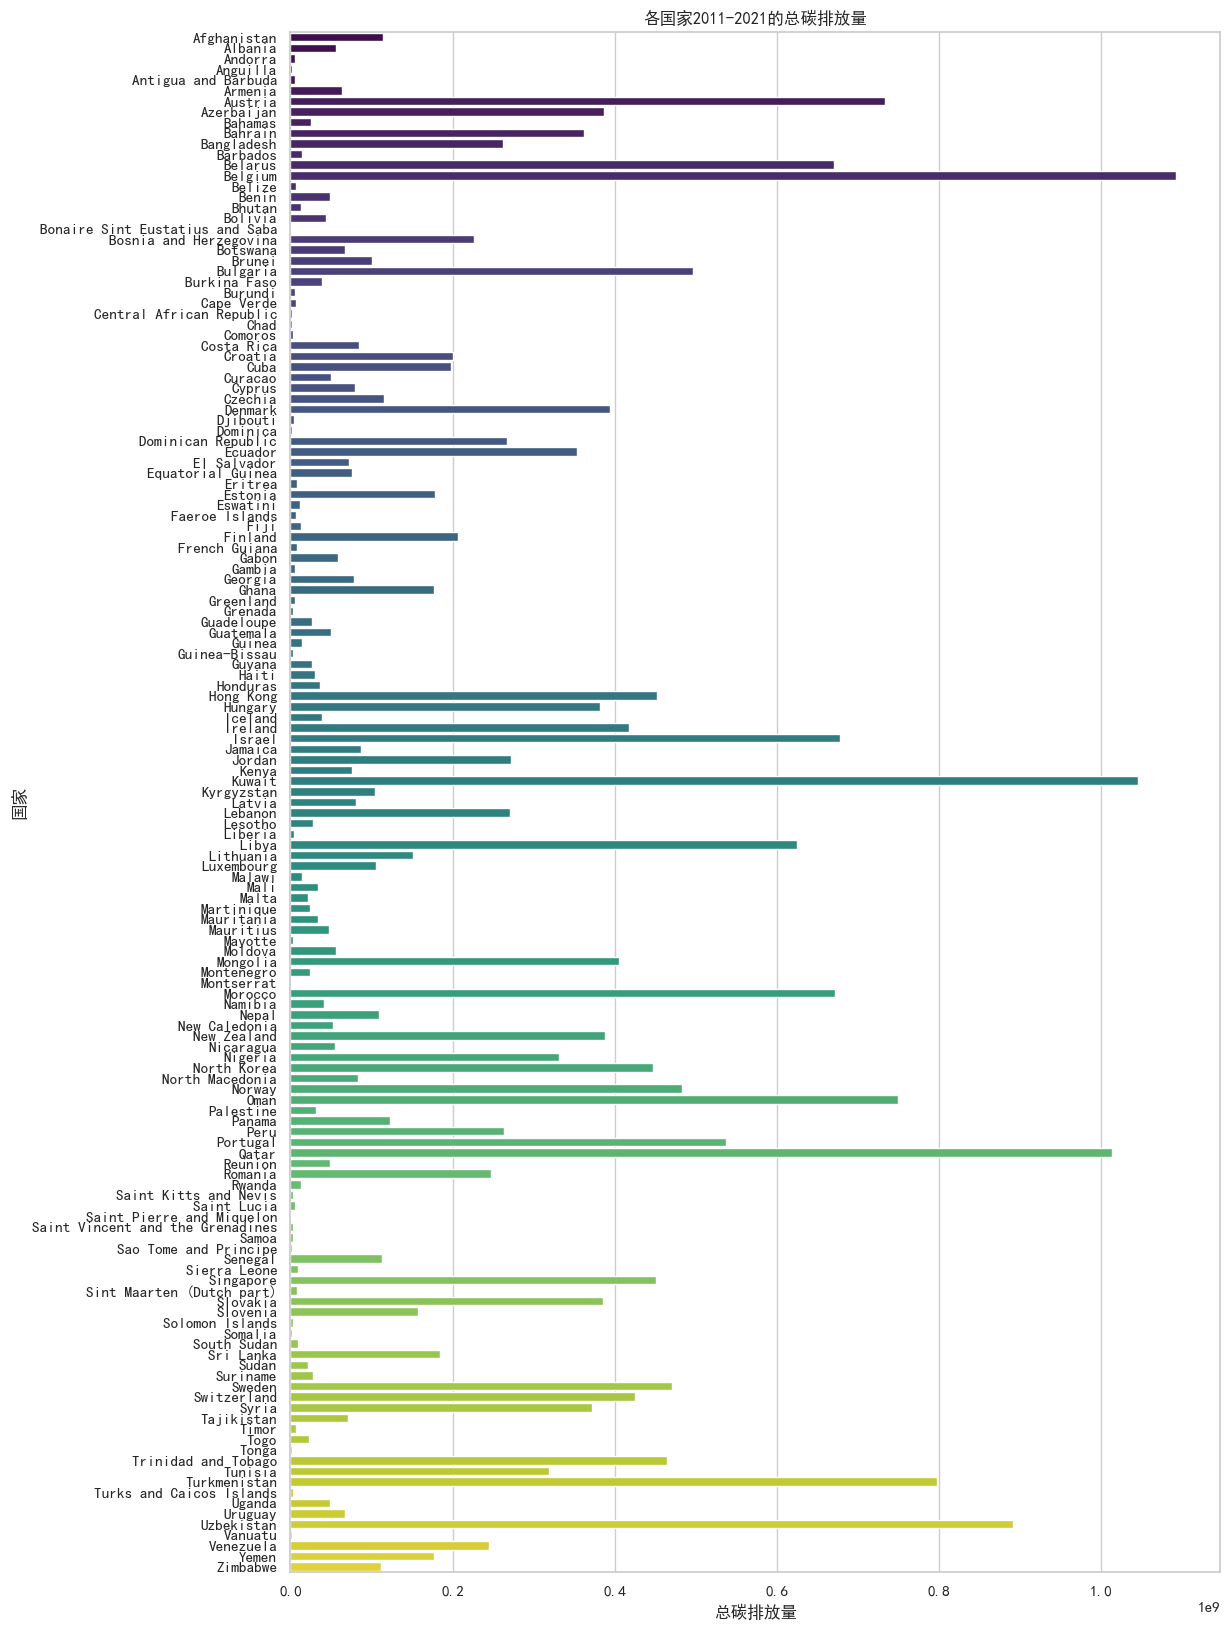

In [76]:
#可视化数据
import seaborn as sns
#设置可视化风格
sns.set(style="whitegrid")

plt.rcParams['font.family']='SimHei'        # 设置使用黑体字体以正常显示中文
plt.rcParams['axes.unicode_minus']=False   # 正常显示负号

#按国家绘制总碳排放量柱状图
plt.figure(figsize=(12, 20))
sns.barplot(x='Total_Carbon_Emissions', y='Entity', data=entity_sum, palette='viridis')
plt.xlabel('总碳排放量')
plt.ylabel('国家')
plt.title('各国家2011-2021的总碳排放量')
plt.show()

# 第二个数据集

In [77]:
#加载csv文件
df = pd.read_csv('sorted_file.csv')
print(df.head())

       Country Region        Date  Kilotons of Co2  Metric Tons Per Capita  \
0  Afghanistan   Asia  1990-01-01           2380.0                    0.22   
1  Afghanistan   Asia  1991-01-01           2230.0                    0.21   
2  Afghanistan   Asia  1992-01-01           1390.0                    0.12   
3  Afghanistan   Asia  1993-01-01           1340.0                    0.10   
4  Afghanistan   Asia  1994-01-01           1290.0                    0.08   

   Kilotons of Co2_标准化  Metric Tons Per Capita_标准化  Kilotons of Co2_归一化  \
0            -0.578144                   -0.857772             0.016550   
1            -0.583103                   -0.861139             0.015507   
2            -0.610874                   -0.891441             0.009666   
3            -0.612528                   -0.898175             0.009318   
4            -0.614181                   -0.904909             0.008970   

   Metric Tons Per Capita_归一化  
0                    0.018018  
1               

In [78]:
#数据探索性分析
#计算描述性统计
print(df.describe())

       Kilotons of Co2  Metric Tons Per Capita  Kilotons of Co2_标准化  \
count      4593.000000             4593.000000         4.593000e+03   
mean      19867.234923                2.767629        -5.259842e-17   
std       30250.481999                2.970377         1.000109e+00   
min           0.000000                0.000000        -6.568291e-01   
25%         750.000000                0.380000        -6.320334e-01   
50%        5140.000000                1.510000        -4.868960e-01   
75%       26960.000000                4.450000         2.344934e-01   
max      143810.000000               12.210000         4.097662e+00   

       Metric Tons Per Capita_标准化  Kilotons of Co2_归一化  \
count                4.593000e+03          4593.000000   
mean                 8.044464e-17             0.138149   
std                  1.000109e+00             0.210350   
min                 -9.318448e-01             0.000000   
25%                 -8.039010e-01             0.005215   
50%         

In [79]:
#按地区计算1990-2019年1.1总碳排放量和人均碳排放量
region_group = df.groupby('Region').agg(
    total_co2=('Kilotons of Co2','sum'),
    avg_per_capita_co2=('Metric Tons Per Capita','mean')
).reset_index()

#显示汇总结果
print(region_group)

     Region    total_co2  avg_per_capita_co2
0    Africa  14300369.99            0.910065
1  Americas  13878960.01            2.551567
2      Asia  28464480.00            2.757339
3    Europe  33513190.00            6.284159
4   Oceania   1093210.00            2.416119


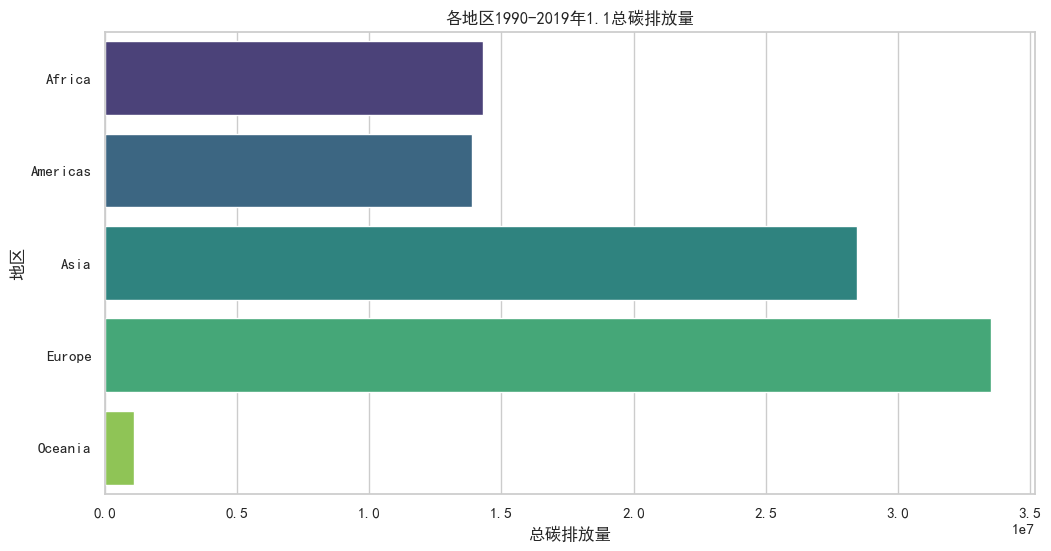

In [80]:
#可视化数据
import seaborn as sns
#设置可视化风格
sns.set(style="whitegrid")

plt.rcParams['font.family']='SimHei'        # 设置使用黑体字体以正常显示中文
plt.rcParams['axes.unicode_minus']=False   # 正常显示负号

#按地区绘制总碳排放量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='total_co2', y='Region', data=region_group, palette='viridis')
plt.xlabel('总碳排放量')
plt.ylabel('地区')
plt.title('各地区1990-2019年1.1总碳排放量')
plt.show()

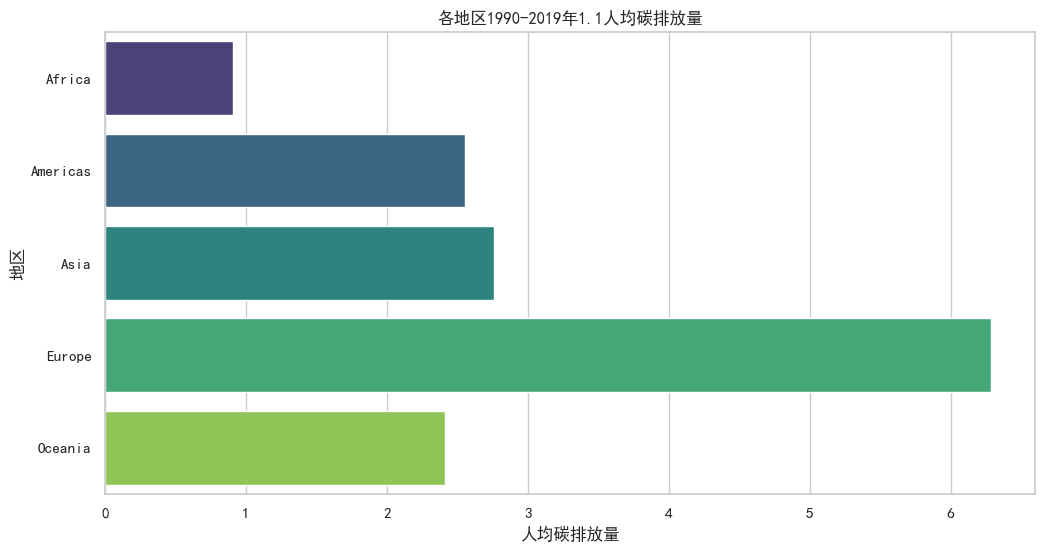

In [81]:
#按地区绘制人均碳排放量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_per_capita_co2', y='Region', data=region_group, palette='viridis')
plt.xlabel('人均碳排放量')
plt.ylabel('地区')
plt.title('各地区1990-2019年1.1人均碳排放量')
plt.show()

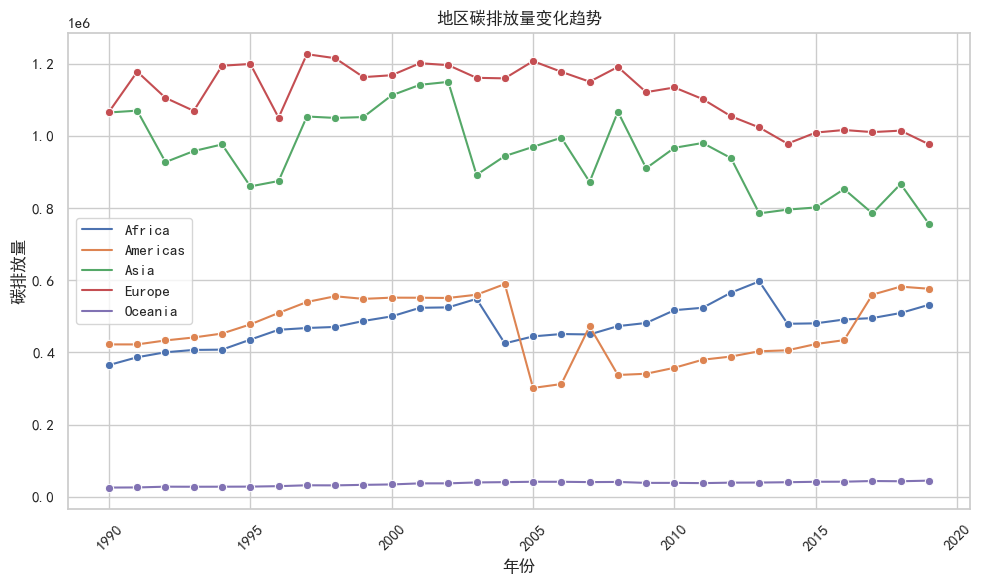

In [82]:
#可视化地区碳排放量变化趋势

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# 按Region和Date进行分组，计算每个Region在每年1.1的总碳排放量
df['Year'] = df['Date'].dt.year  # 提取年份
df_grouped = df.groupby(['Region', 'Year'])['Kilotons of Co2'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped, x='Year', y='Kilotons of Co2', hue='Region', marker='o')
    
plt.title("地区碳排放量变化趋势")
plt.xlabel("年份")
plt.ylabel("碳排放量")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 第三个数据集

In [83]:
#加载csv文件
df = pd.read_csv('newfile.csv')
print(df.head())

        Entity  Year  Renewable-electricity-generating-capacity-per-capita  \
0  Afghanistan  2000                                               9.22      
1  Afghanistan  2001                                               8.86      
2  Afghanistan  2002                                               8.47      
3  Afghanistan  2003                                               8.09      
4  Afghanistan  2004                                               7.75      

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                             

F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
F:\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


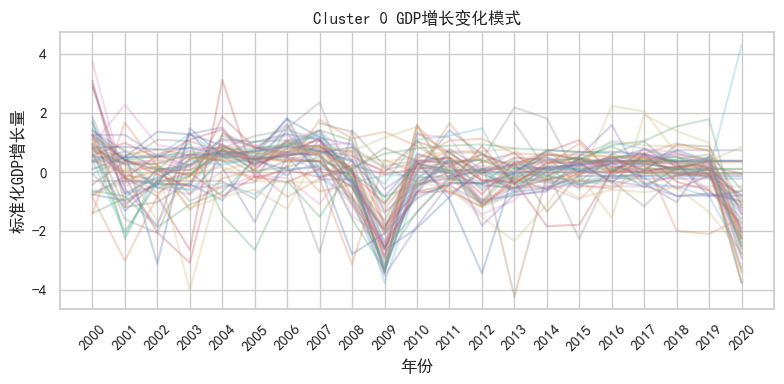

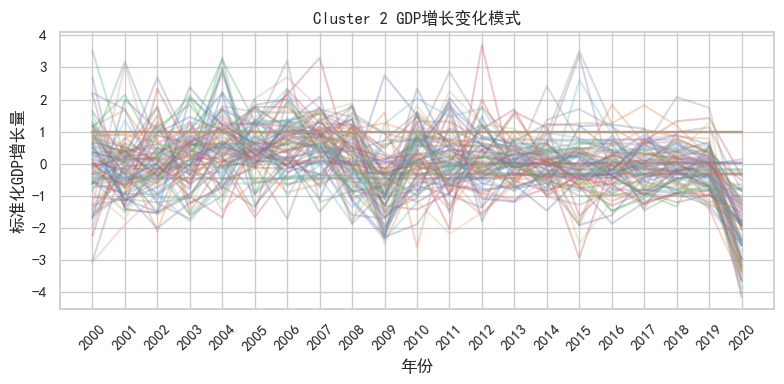

In [84]:
#时序聚类分析
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# 构建时序数据
time_series_data = df.pivot(index="Entity", columns="Year", values="gdp_growth").fillna(method='ffill', axis=1)

# 标准化数据
scaler = TimeSeriesScalerMeanVariance()
scaled_data = scaler.fit_transform(time_series_data.values)

# DTW + K-means聚类
dtw_km = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=42)
clusters = dtw_km.fit_predict(scaled_data)

# 将聚类结果添加到DataFrame
time_series_data["Cluster"] = clusters

# 绘制聚类结果图
for cluster in np.unique(clusters):
    plt.figure(figsize=(8, 4))
    plt.title(f"Cluster {cluster} GDP增长变化模式")
    for ts in scaled_data[clusters == cluster]:
        plt.plot(ts.ravel(), alpha=0.3)
    plt.xlabel("年份")
    plt.ylabel("标准化GDP增长量")
    plt.xticks(ticks=range(len(time_series_data.columns)-1), labels=time_series_data.columns[:-1], rotation=45)
    plt.tight_layout()
    plt.show()

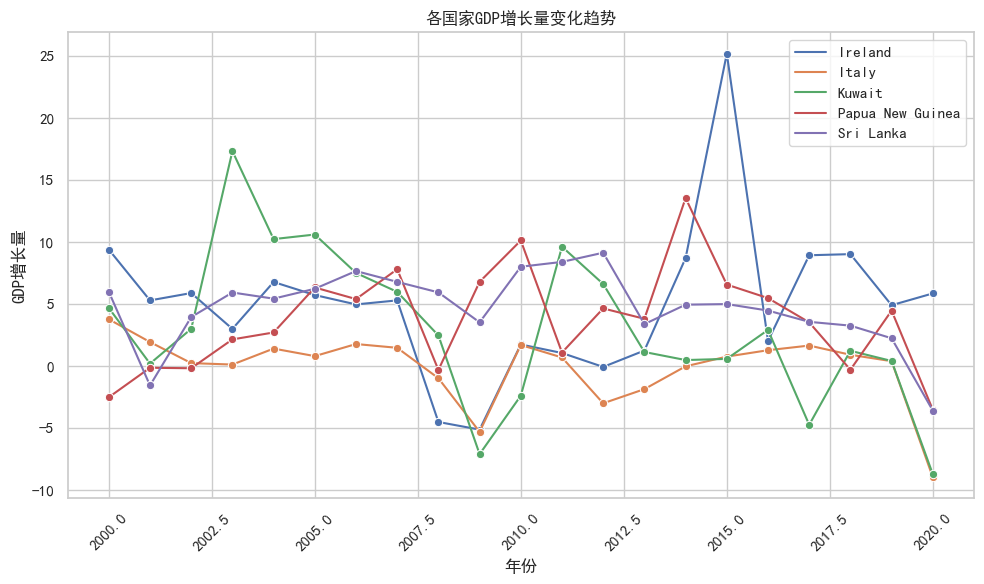

In [53]:
#各国家GDP增长量变化趋势
import random
entities = df['Entity'].unique()  # 获取所有 unique 的 Entity
selected_entities_random = random.sample(list(entities), 5)  # 随机选择5个 Entity
filtered_df_random = df[df['Entity'].isin(selected_entities_random)]

plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df_random, x='Year', y='gdp_growth', hue='Entity', marker='o')
    
plt.title("各国家GDP增长量变化趋势")
plt.xlabel("年份")
plt.ylabel("GDP增长量")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
#数据探索性分析
#计算描述性统计
print(df.describe())

              Year  Renewable-electricity-generating-capacity-per-capita  \
count  3180.000000                                        3180.000000      
mean   2009.798428                                          35.202613      
std       5.998474                                          35.644779      
min    2000.000000                                           0.000000      
25%    2005.000000                                           5.825000      
50%    2010.000000                                          32.910000      
75%    2015.000000                                          39.110000      
max    2020.000000                                         156.290000      

       Renewable energy share in the total final energy consumption (%)  \
count                                        3180.000000                  
mean                                           32.215377                  
std                                            30.043429                  
min            

In [86]:
#按国家计算2000-2020年人均可再生电力发电能力、总化石燃料发电量、总核能发电量、总可再生能源发电量、总GDP增长和人均GDP
entity_sum = df.groupby('Entity').agg(
    Average_Renewable_Electricity=('Renewable-electricity-generating-capacity-per-capita','mean'),
    Total_Fossil_Electricity=('Electricity from fossil fuels (TWh)','sum'),
    Total_Nuclear_Electricity=('Electricity from nuclear (TWh)','sum'),
    Total_Renewable_Electricity=('Electricity from renewables (TWh)','sum'),
    Total_GDP_Growth=('gdp_growth','sum'),
    Average_GDP_captia=('gdp_per_capita','mean')
).reset_index()

#显示汇总结果
print(entity_sum)

                  Entity  Average_Renewable_Electricity  \
0            Afghanistan                       8.581429   
1                Albania                      32.910000   
2                Algeria                       9.390000   
3                 Angola                      43.951429   
4    Antigua and Barbuda                      15.179000   
..                   ...                            ...   
154           Uzbekistan                      61.972381   
155              Vanuatu                      19.339524   
156                Yemen                       1.672381   
157               Zambia                     142.904444   
158             Zimbabwe                      66.068571   

     Total_Fossil_Electricity  Total_Nuclear_Electricity  \
0                        3.98                        0.0   
1                        1.02                        0.0   
2                      984.81                        0.0   
3                       42.85                      

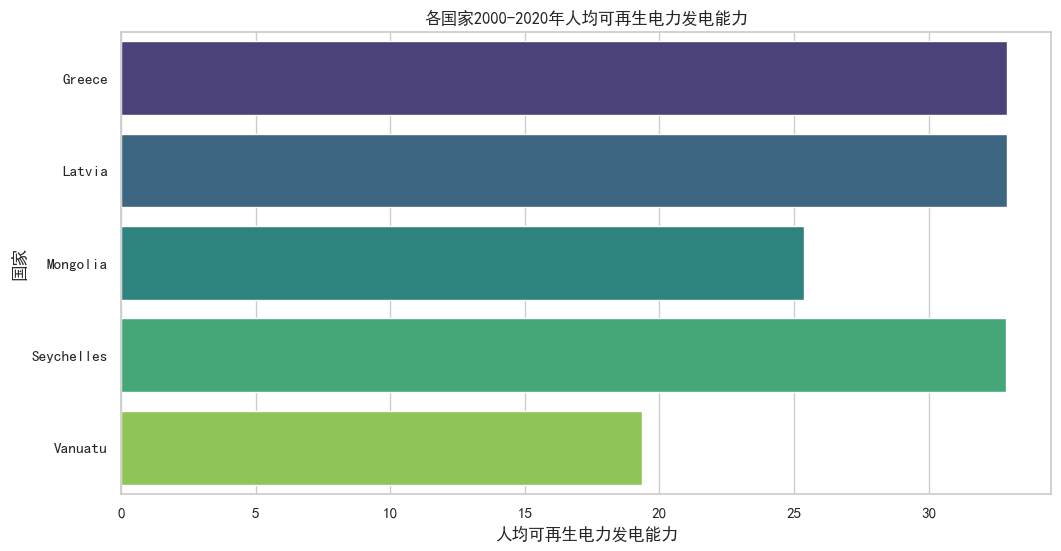

In [87]:
#可视化数据
import seaborn as sns
#设置可视化风格
sns.set(style="whitegrid")

plt.rcParams['font.family']='SimHei'        # 设置使用黑体字体以正常显示中文
plt.rcParams['axes.unicode_minus']=False   # 正常显示负号

#绘制各国家人均可再生电力发电能力柱状图
# 随机选择N个Entity，假设随机选择5个实体
n = 5  # 你可以修改这个数字来控制选取的数量
random_entities = entity_sum['Entity'].sample(n=n, random_state=42)  # random_state设置为42确保结果可复现

# 按随机选定的Entity筛选数据
filtered_data = entity_sum[entity_sum['Entity'].isin(random_entities)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Renewable_Electricity', y='Entity', data=filtered_data, palette='viridis')
plt.xlabel('人均可再生电力发电能力')
plt.ylabel('国家')
plt.title('各国家2000-2020年人均可再生电力发电能力')
plt.show()

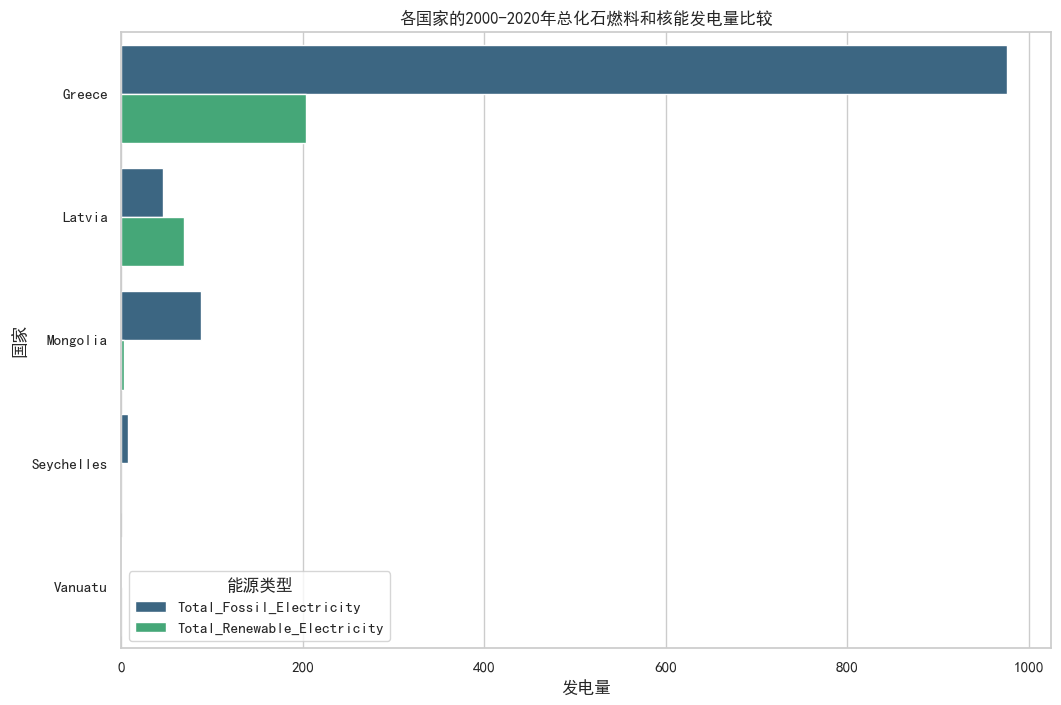

In [88]:
#绘制各国家2000-2020总化石燃料发电量和总可再生能源发电量对比图
# 将化石燃料发电量和可再生能源发电量的数据进行合并，以便在同一图上显示
melted_data = filtered_data.melt(id_vars=['Entity'], value_vars=['Total_Fossil_Electricity', 'Total_Renewable_Electricity'],
                                  var_name='Energy_Type', value_name='Generation_Amount')

# 绘制柱状图
plt.figure(figsize=(12, 8))
sns.barplot(x='Generation_Amount', y='Entity', hue='Energy_Type', data=melted_data, palette='viridis')

plt.xlabel('发电量')
plt.ylabel('国家')
plt.title('各国家的2000-2020年总化石燃料和核能发电量比较')
plt.legend(title='能源类型')
plt.show()

# 第四个数据集

In [89]:
#加载csv文件
df = pd.read_csv('newfile2.csv')
print(df.head())

   Unnamed: 0        Country         Energy_type  Year  Energy_consumption  \
0         137         Bhutan  renewables_n_other  1980        7.938802e-05   
1         155       Botswana  renewables_n_other  1980        2.200000e-41   
2         245          Chile  renewables_n_other  1980        8.152909e-02   
3         323        Denmark  renewables_n_other  1980       -5.118053e-04   
4         551  Guinea-Bissau  renewables_n_other  1980        0.000000e+00   

   Energy_production         GDP  Population  Energy_intensity_per_capita  \
0           0.000062    0.537717    406.8830                     0.331848   
1           0.000000    3.928214    897.8602                    16.426568   
2           0.077318   81.171100  11362.0000                    37.597628   
3           0.000426  151.358700   5123.2700                   167.104336   
4           0.000000    1.167600    781.6780                     1.563740   

   Energy_intensity_by_GDP  CO2_emission  
0                 0.25110

In [90]:
#数据探索性分析
#计算描述性统计
print(df.describe())

         Unnamed: 0          Year  Energy_consumption  Energy_production  \
count  13775.000000  13775.000000        13775.000000       13775.000000   
mean   32065.161525   2002.668603            0.009371           0.005206   
std    13299.830637      9.592837            0.017641           0.016191   
min      137.000000   1980.000000           -0.022368           0.000000   
25%    20971.500000   1995.000000            0.000000           0.000000   
50%    32005.000000   2003.000000            0.001295           0.000000   
75%    43429.500000   2011.000000            0.011070           0.001022   
max    55439.000000   2019.000000            0.166272           0.139867   

                GDP    Population  Energy_intensity_per_capita  \
count  13775.000000  13775.000000                 13775.000000   
mean      23.983751   4658.840003                    33.932446   
std       35.292330   5518.785204                    39.398714   
min        0.124958     16.155000                  

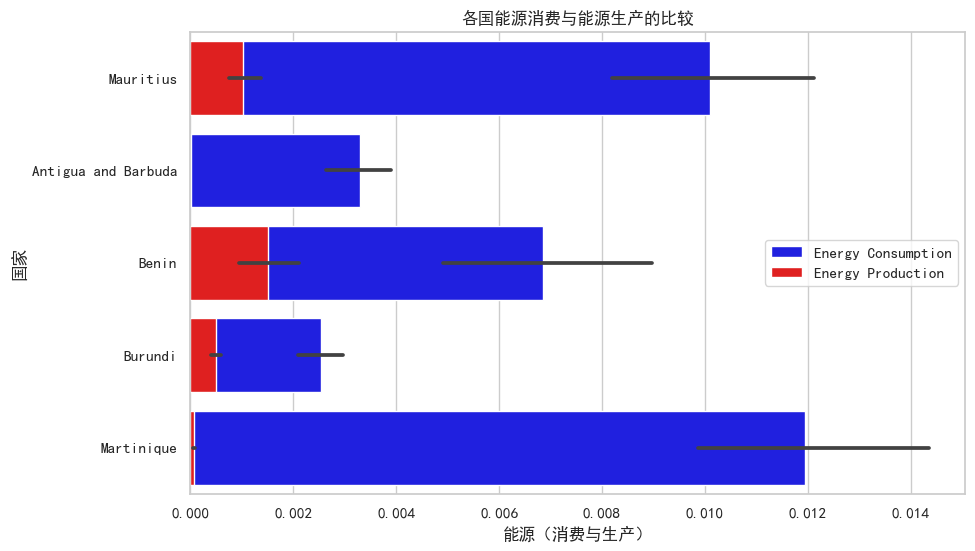

In [93]:
#各国能源消费与能源生产的比较
plt.rcParams['font.family']='SimHei'        # 设置使用黑体字体以正常显示中文
plt.rcParams['axes.unicode_minus']=False   # 正常显示负号

# 随机选择五个国家
random_countries = df['Country'].sample(5, random_state=42)

# 筛选出这五个国家的数据
selected_data = df[df['Country'].isin(random_countries)]

# 绘制能源消费与能源生产的比较
plt.figure(figsize=(10, 6))
sns.barplot(x='Energy_consumption', y='Country', data=selected_data, color='blue', label='Energy Consumption')
sns.barplot(x='Energy_production', y='Country', data=selected_data, color='red', label='Energy Production')
plt.title('各国能源消费与能源生产的比较')
plt.xlabel('能源（消费与生产）')
plt.ylabel('国家')
plt.legend()
plt.show()

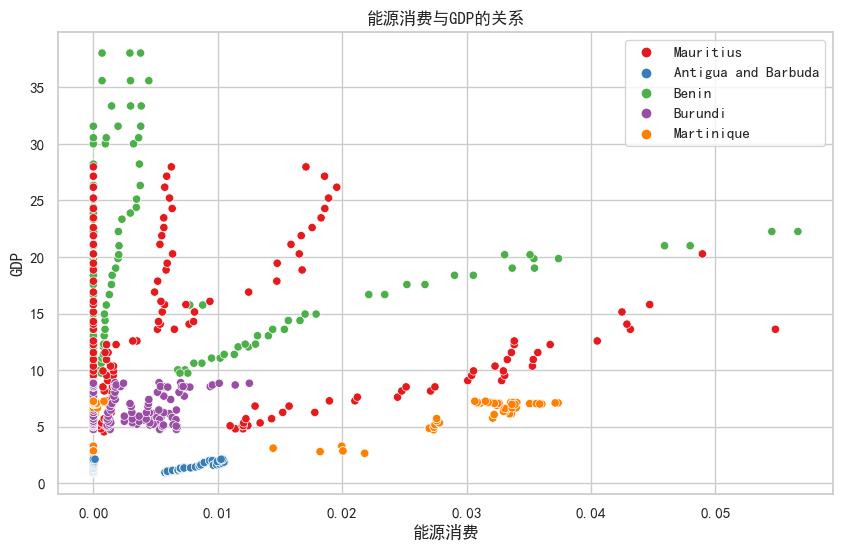

In [94]:
# 绘制能源消费与GDP的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy_consumption', y='GDP', data=selected_data, hue='Country', palette='Set1')
plt.title('能源消费与GDP的关系')
plt.xlabel('能源消费')
plt.ylabel('GDP')
plt.legend()
plt.show()

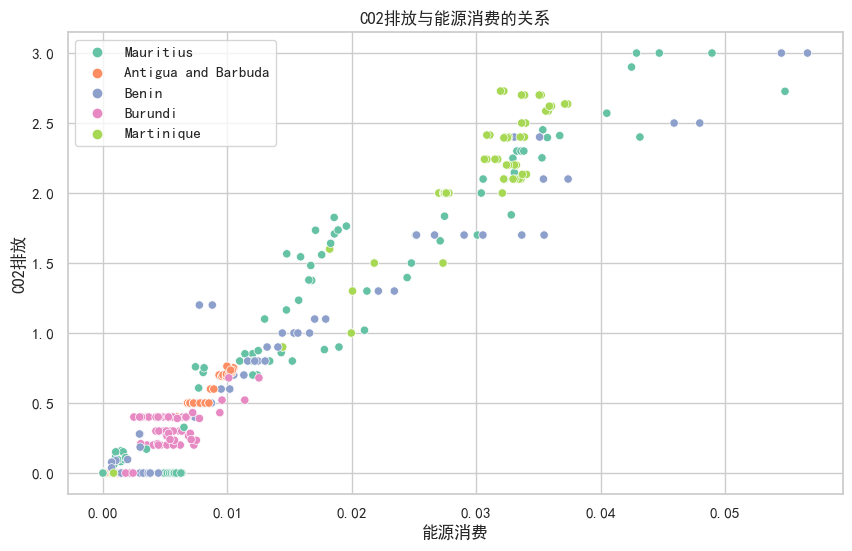

In [95]:
# 绘制CO2排放与能源消费的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy_consumption', y='CO2_emission', data=selected_data, hue='Country', palette='Set2')
plt.title('CO2排放与能源消费的关系')
plt.xlabel('能源消费')
plt.ylabel('CO2排放')
plt.legend()
plt.show()

# 第五个数据集

In [96]:
#加载csv文件
df = pd.read_csv('newfile3.csv')
print(df.head())

                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4    8.001164  


In [97]:
#数据探索性分析
#计算描述性统计
print(df.describe())

       Temperature  CO2 Emissions  Sea Level Rise  Precipitation     Humidity  \
count  9842.000000    9842.000000     9842.000000    9842.000000  9842.000000   
mean     14.930728     400.440597       -0.002762      49.936192    49.813058   
std       4.877220      48.049076        0.990451      28.870484    28.916971   
min       1.486266     268.164350       -4.092155       0.010143     0.018998   
25%      11.590960     367.623964       -0.673561      24.580707    24.791290   
50%      14.986391     400.921272        0.004254      49.834866    49.701669   
75%      18.281378     433.063972        0.674179      74.591708    75.227540   
max      28.330762     532.556055        4.116559      99.991900    99.959665   

        Wind Speed  
count  9842.000000  
mean     25.098702  
std      14.467183  
min       0.001732  
25%      12.579462  
50%      24.937266  
75%      37.672781  
max      49.997664  


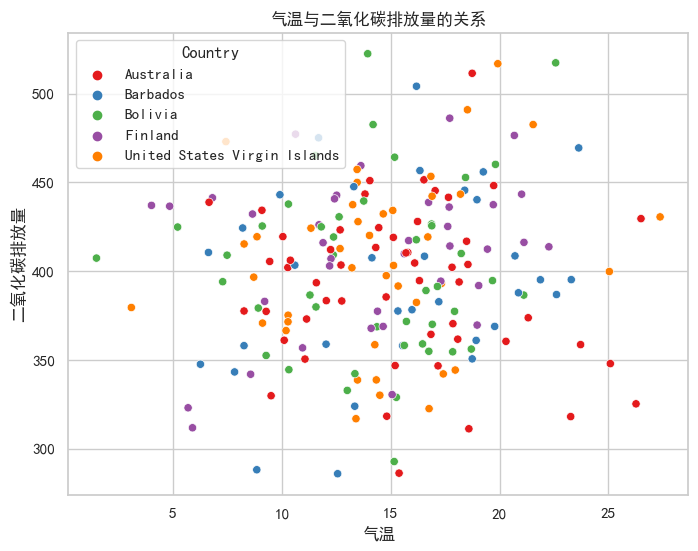

In [100]:
# 随机选择5个国家
random_countries = df['Country'].sample(5, random_state=42).tolist()

# 筛选出这些国家的数据
filtered_data = df[df['Country'].isin(random_countries)]

# 设置画布风格
sns.set(style="whitegrid")
plt.rcParams['font.family']='SimHei'        # 设置使用黑体字体以正常显示中文
plt.rcParams['axes.unicode_minus']=False   # 正常显示负号

# 气温与CO2排放的关系
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='Temperature', y='CO2 Emissions', hue='Country', palette='Set1')
plt.title('气温与二氧化碳排放量的关系')
plt.xlabel('气温')
plt.ylabel('二氧化碳排放量')
plt.legend(title='Country')
plt.show()

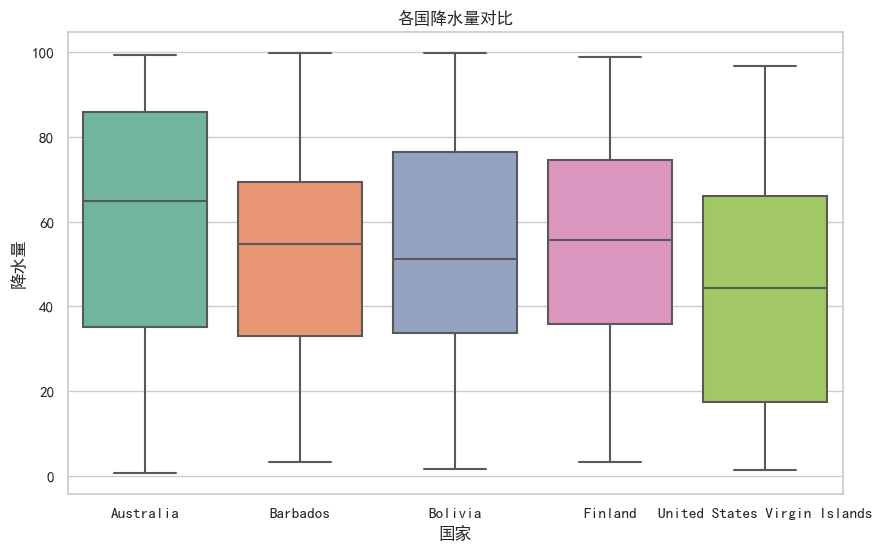

In [102]:
# 各国的降水量比较
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Country', y='Precipitation', palette='Set2')
plt.title('各国降水量对比')
plt.xlabel('国家')
plt.ylabel('降水量')
plt.show()

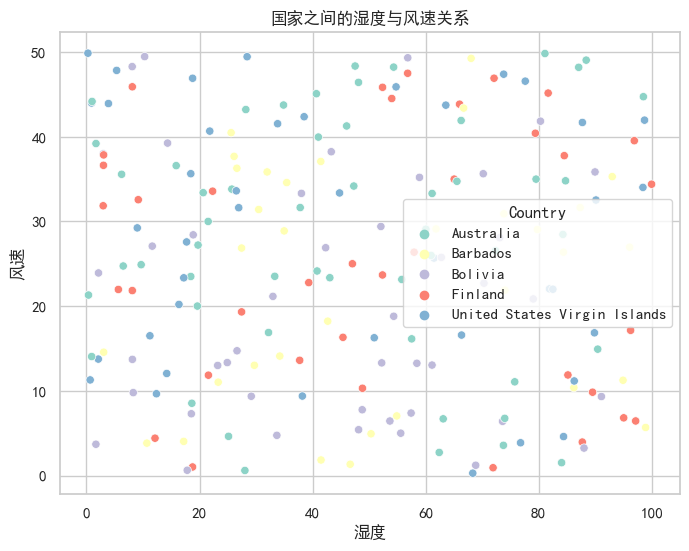

In [103]:
# 国家之间的湿度与风速关系
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='Humidity', y='Wind Speed', hue='Country', palette='Set3')
plt.title('国家之间的湿度与风速关系')
plt.xlabel('湿度')
plt.ylabel('风速')
plt.legend(title='Country')
plt.show()